In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Importing Data set

In [45]:
file = 'C:/Users/Gayathri/Desktop/starbucks_drinkMenu_expanded.csv'
df = pd.read_csv(file,header=None,skiprows=1)
df.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410


In [107]:
cols = ['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total_Fat(g)', 'Trans_Fat(g) ', 'Saturated_Fat(g)', 'Sodium(mg)',
       'Total_Carbohydrates(g)', 'Cholesterol(mg)', 'Dietary_Fibre(g)',
       'Sugars(g)', 'Protein(g)', 'VitaminA(% DV) ', 'VitaminC(%DV)',
       'Calcium(%DV) ', 'Iron(%DV) ', 'Caffeine(mg)']

In [108]:
df.columns = cols

In [109]:
df.head(4)

,Beverage_category,Beverage,Beverage_prep,Calories,Total_Fat(g),Trans_Fat(g),Saturated_Fat(g),Sodium(mg),Total_Carbohydrates(g),Cholesterol(mg),Dietary_Fibre(g),Sugars(g),Protein(g),VitaminA(% DV),VitaminC(%DV),Calcium(%DV),Iron(%DV),Caffeine(mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Beverage_category       242 non-null    object 
 1   Beverage                242 non-null    object 
 2   Beverage_prep           242 non-null    object 
 3   Calories                242 non-null    int64  
 4   Total_Fat(g)            242 non-null    float64
 5   Trans_Fat(g)            242 non-null    float64
 6   Saturated_Fat(g)        242 non-null    float64
 7   Sodium(mg)              242 non-null    int64  
 8   Total_Carbohydrates(g)  242 non-null    int64  
 9   Cholesterol(mg)         242 non-null    int64  
 10   Dietary_Fibre(g)       242 non-null    int64  
 11  Sugars(g)               242 non-null    int64  
 12  Protein(g)              242 non-null    float64
 13  VitaminA(% DV)          242 non-null    object 
 14  VitaminC(%DV)           242 non-null    ob

In [64]:
df['Total_Fat(g)'] = df['Total_Fat(g)'].str.replace('3 2','32')

In [66]:
df['Total_Fat(g)'] = pd.to_numeric(df['Total_Fat(g)'])

### Beverage Category

In [50]:

df['Beverage_category'].value_counts()

Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: Beverage_category, dtype: int64

### Beverage in the Category

In [51]:
df.groupby(by=['Beverage_category'])['Beverage'].value_counts()

Beverage_category                  Beverage                                           
Classic Espresso Drinks            Caffè Latte                                            12
                                   Caffè Mocha (Without Whipped Cream)                    12
                                   Cappuccino                                             12
                                   Vanilla Latte (Or Other Flavoured Latte)               12
                                   Caffè Americano                                         4
                                   Skinny Latte (Any Flavour)                              4
                                   Espresso                                                2
Coffee                             Brewed Coffee                                           4
Frappuccino® Blended Coffee        Caramel (Without Whipped Cream)                         9
                                   Coffee                                   

### Beverage Category with high Calories

<AxesSubplot:xlabel='Calories', ylabel='Beverage_category'>

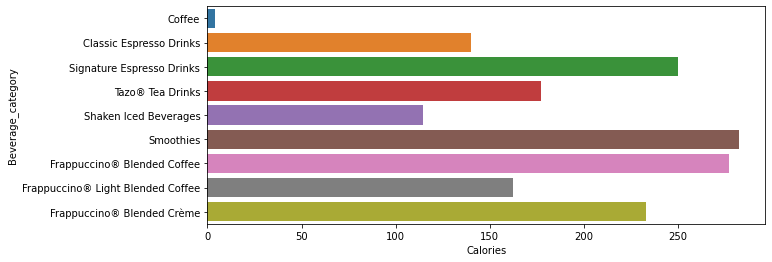

In [208]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'Calories',y='Beverage_category',data=df,ci=None)

### Beverage Size with high Calories

Text(0, 0.5, '')

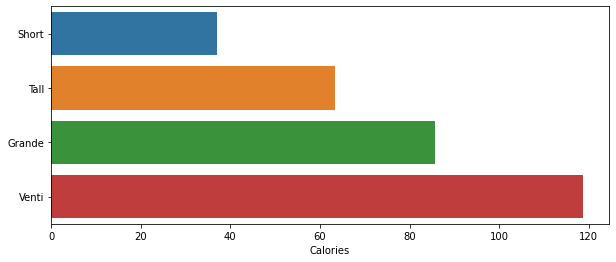

In [209]:
plt.figure(figsize=(10,4))
sizes = df[(df.Beverage_prep == 'Short') | (df.Beverage_prep == 'Venti') | (df.Beverage_prep == 'Grande') | (df.Beverage_prep == 'Tall')]
bar_sizes = sns.barplot(x="Calories", y="Beverage_prep", data=sizes,ci=None)
plt.ylabel("")

### Total Fat in Beverage Category

<AxesSubplot:xlabel='Total_Fat(g)', ylabel='Beverage_category'>

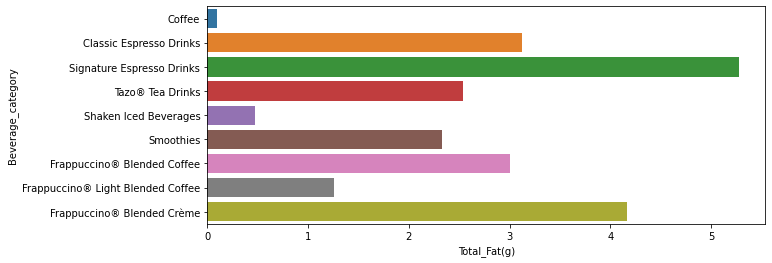

In [210]:
plt.figure(figsize=(10,4))
sns.barplot(x='Total_Fat(g)',y='Beverage_category',data=df,ci=None)




### Calories Vs Total Fat
    
**Beverage with high calories are high in total Fat**


<AxesSubplot:xlabel='Calories', ylabel='Total_Fat(g)'>

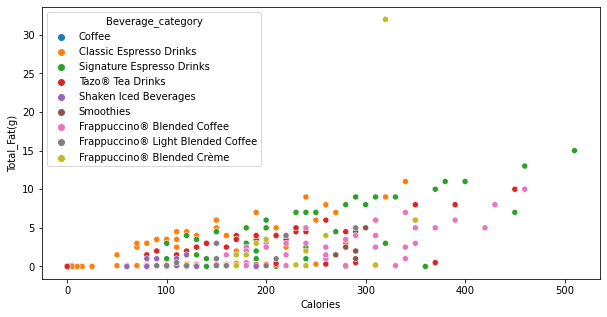

In [83]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Calories',y='Total_Fat(g)', hue='Beverage_category',data=df)

### Calaories Vs Sugar
 **Beverage with high calories has high sugar. It is positively corelated**

<AxesSubplot:xlabel='Calories', ylabel='Sugars(g)'>

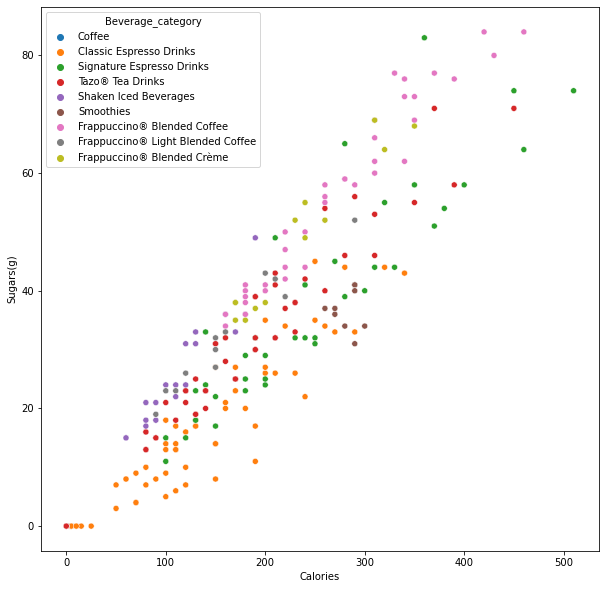

In [101]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Calories',y='Sugars(g)', hue='Beverage_category',data=df)

### Calaories Vs Cholesterol
 **Beverage with high calories is high in Cholestrol. It is positively corelated**

<AxesSubplot:xlabel='Calories', ylabel='Cholesterol(mg)'>

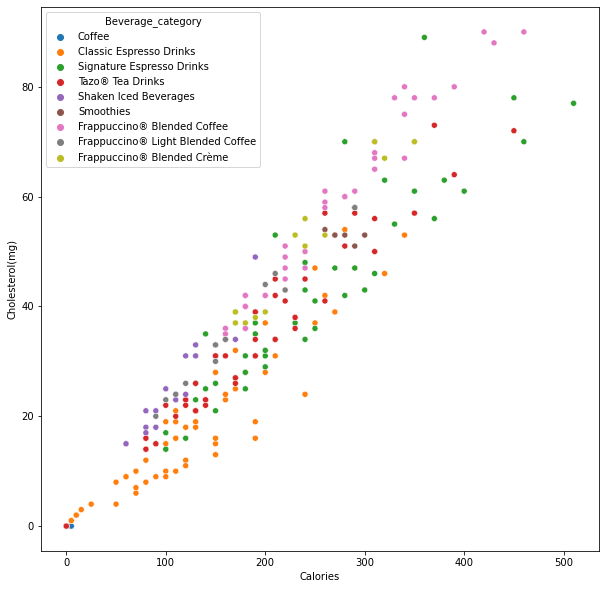

In [236]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Calories',y='Cholesterol(mg)',hue='Beverage_category',data=df,ci=None)

### Calaories Vs Carbs
 **Beverage with high calories is high carbs. It is positively corelated**

<AxesSubplot:xlabel='Calories', ylabel='Total_Carbohydrates(g)'>

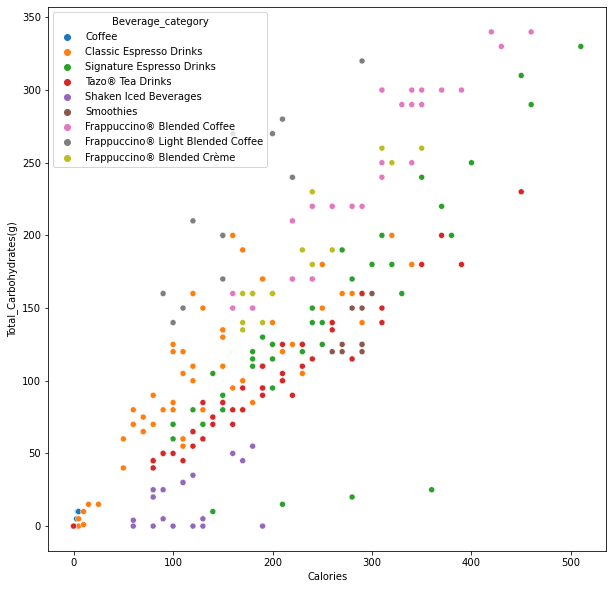

In [237]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Calories',y='Total_Carbohydrates(g)',hue='Beverage_category',data=df,ci=None)


In [126]:
features = ['Beverage_category', 'Calories','Total_Fat(g)', 'Trans_Fat(g) ', 'Saturated_Fat(g)', 'Sodium(mg)',
       'Total_Carbohydrates(g)', 'Cholesterol(mg)', 'Dietary_Fibre(g)',
       'Sugars(g)', 'Protein(g)']

### Creating a Dataframe with Nutritional facts

In [131]:
df1 = df[features]

In [132]:
df1.head(4)

,Beverage_category,Calories,Total_Fat(g),Trans_Fat(g),Saturated_Fat(g),Sodium(mg),Total_Carbohydrates(g),Cholesterol(mg),Dietary_Fibre(g),Sugars(g),Protein(g)
0,Coffee,3,0.1,0.0,0.0,0,5,0,0,0,0.3
1,Coffee,4,0.1,0.0,0.0,0,10,0,0,0,0.5
2,Coffee,5,0.1,0.0,0.0,0,10,0,0,0,1.0
3,Coffee,5,0.1,0.0,0.0,0,10,0,0,0,1.0


### Correlation Heat map

<AxesSubplot:>

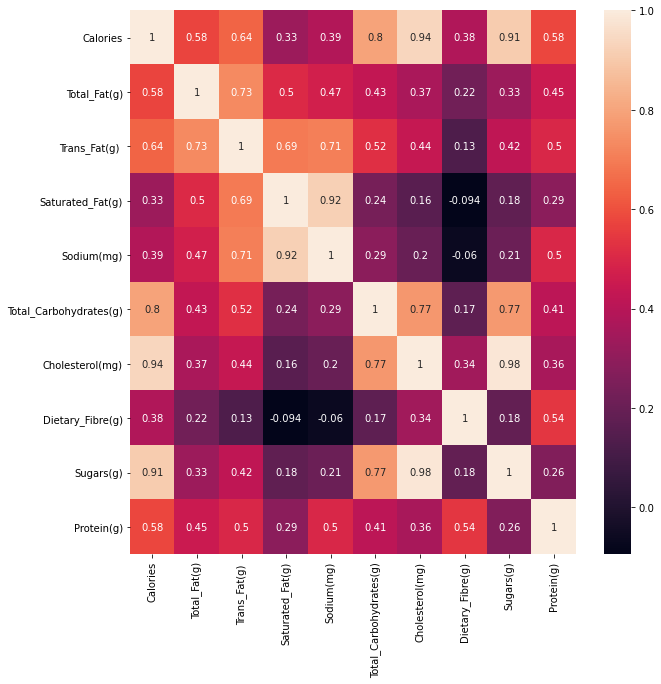

In [112]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True)

In [134]:
df1 = df1.set_index('Beverage_category')

In [135]:
df1.head(4)

,Calories,Total_Fat(g),Trans_Fat(g),Saturated_Fat(g),Sodium(mg),Total_Carbohydrates(g),Cholesterol(mg),Dietary_Fibre(g),Sugars(g),Protein(g)
Beverage_category,,,,,,,,,,
Coffee,3,0.1,0.0,0.0,0,5,0,0,0,0.3
Coffee,4,0.1,0.0,0.0,0,10,0,0,0,0.5
Coffee,5,0.1,0.0,0.0,0,10,0,0,0,1.0
Coffee,5,0.1,0.0,0.0,0,10,0,0,0,1.0


In [138]:
# Passing the DF to 'Scale()'

scaler = StandardScaler()
scaler.fit(df1)
df_scale = scaler.transform(df1)
df_scaled = pd.DataFrame(df_scale,columns=['Calories','Total_Fat(g)', 'Trans_Fat(g) ', 'Saturated_Fat(g)', 'Sodium(mg)',
       'Total_Carbohydrates(g)', 'Cholesterol(mg)', 'Dietary_Fibre(g)',
       'Sugars(g)', 'Protein(g)'])

In [216]:
df_scale

array([[-1.85943369, -0.83999052, -0.79849216, ..., -0.55842758,
        -1.67414054, -1.37373195],
       [-1.8496919 , -0.83999052, -0.79849216, ..., -0.55842758,
        -1.67414054, -1.33259309],
       [-1.83995011, -0.83999052, -0.79849216, ..., -0.55842758,
        -1.67414054, -1.22974594],
       ...,
       [ 0.05969865,  0.13675369,  0.42335484, ..., -0.55842758,
         0.25583268, -0.81835733],
       [-0.13513712, -0.43780173, -0.67630746, ...,  0.13459537,
         0.10346638, -0.81835733],
       [ 0.44937019, -0.83999052, -0.73739981, ..., -0.55842758,
         1.11924176, -0.40696873]])

In [213]:
df_scaled.head(4)

,Calories,Total_Fat(g),Trans_Fat(g),Saturated_Fat(g),Sodium(mg),Total_Carbohydrates(g),Cholesterol(mg),Dietary_Fibre(g),Sugars(g),Protein(g)
0,-1.859434,-0.839991,-0.798492,-0.52792,-0.738892,-1.508338,-1.73436,-0.558428,-1.674141,-1.373732
1,-1.849692,-0.839991,-0.798492,-0.52792,-0.738892,-1.447461,-1.73436,-0.558428,-1.674141,-1.332593
2,-1.839950,-0.839991,-0.798492,-0.52792,-0.738892,-1.447461,-1.73436,-0.558428,-1.674141,-1.229746
3,-1.839950,-0.839991,-0.798492,-0.52792,-0.738892,-1.447461,-1.73436,-0.558428,-1.674141,-1.229746


In [217]:
df_test = df_scaled[['Calories','Total_Fat(g)']].to_numpy()


### Catogorizing in to  clusters based on the Calories and Total Fat

In [227]:
# K-mean clustering
model = KMeans(n_clusters= 2)


In [228]:
cluster_assignments = model.fit_predict(df_test)

In [229]:
centroids = model.cluster_centers_
print(centroids)

[[-0.4617434  -0.42217786]
 [ 1.11208622  1.01679455]]


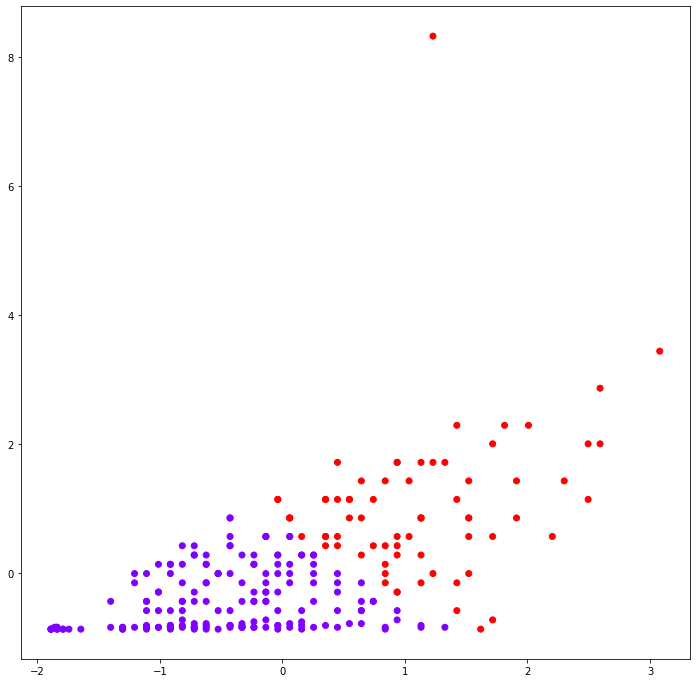

In [230]:

plt.figure(figsize=(12,12))
plt.scatter(df_test[:,0],df_test[:,1],c=cluster_assignments,cmap='rainbow')